In [2]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Ghiordy F. Contreras\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
tf.__version__

'1.5.0'

## Data Relative humidity vs. Temperature

In [3]:
DIN = pd.read_csv('DATA/50W/D20190212e.txt',
                 names=['Time','Temperature','RH','Voltage','Current'])
temp    = np.array(DIN.Temperature,  dtype=float)
rh = np.array(DIN.RH,  dtype=float)

## Neural network model $T(RH)$

In [38]:
# one neuron on a single layer
rt = tf.keras.layers.Dense(units=1, input_shape=[1]) 
# assembling model
model = tf.keras.Sequential([rt])
# compiling model
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [39]:
# Trainning model
history = model.fit(rh, temp, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


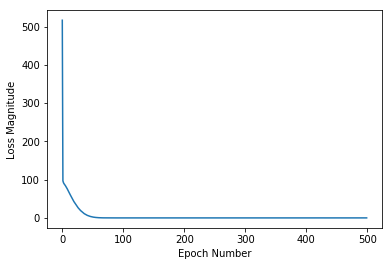

In [40]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [41]:
print(model.predict([0,2]))

[[50.533035]
 [49.322964]]


In [42]:
print("These are the layer variables: {}".format(rt.get_weights()))

These are the layer variables: [array([[-0.6050357]], dtype=float32), array([50.533035], dtype=float32)]


Model found is:

\begin{equation} T(RH) = -0.6050357*RH + 50.533035 \Leftrightarrow 0 \geq RH \geq 100 \end{equation}

## Data $T(R)$

Resistances stats:
count    1177.000000
mean        4.377184
std         5.437202
min       -45.750000
25%         3.346032
50%         4.006826
75%         5.727273
max        51.750000
dtype: float64


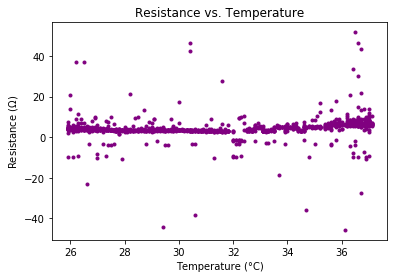

In [56]:
R = DIN.Voltage/DIN.Current
plt.scatter(DIN.Temperature,R,c='purple',marker='.')
plt.title('Resistance vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Resistance ($ \Omega $)')
print('Resistances stats:')
print(R.describe())

Text(0,0.5,'Current (I)')

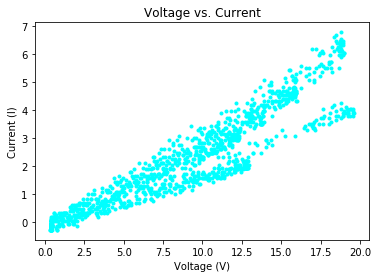

In [54]:
plt.scatter(DIN.Voltage,DIN.Current,c='cyan',marker='.')
plt.title('Voltage vs. Current')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (I)')

## Neural network R(T)

In [57]:
# one neuron on a single layer
RT = tf.keras.layers.Dense(units=1, input_shape=[1]) 
# assembling model
model = tf.keras.Sequential([RT])
# compiling model
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [65]:
# Trainning model
history = model.fit(rh, temp, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


In [66]:
print(model.predict([0,2]))

[[50.530262]
 [49.325603]]


In [69]:
print("These are the layer variables: {}".format(RT.get_weights()))

These are the layer variables: [array([[-0.6023298]], dtype=float32), array([50.530262], dtype=float32)]


Model found is:

\begin{equation} R(T) = -0.6023298*T + 50.530262 \end{equation}